# Library Declaration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
%matplotlib inline

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# DataSet 

In [2]:
df = pd.read_csv('C:/Users/sachin/Downloads/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df['logsp500']=np.log(df['SP500'])
df['diflogsp500']=df['logsp500']-df['logsp500'].shift(periods=-1)
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,7.767945,-0.000207
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,7.768153,0.000601
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,7.767552,-0.000690
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,7.768242,-0.000228
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,7.768470,-0.000326


In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL  

In [6]:
df.shape

(41265, 504)

In [7]:
df_new=df[['DATE','SP500','logsp500','diflogsp500']]
df_new.head()

,DATE,SP500,logsp500,diflogsp500
0,1491226200,2363.6101,7.767945,-0.000207
1,1491226260,2364.1001,7.768153,0.000601
2,1491226320,2362.6799,7.767552,-0.000690
3,1491226380,2364.3101,7.768242,-0.000228
4,1491226440,2364.8501,7.768470,-0.000326


Text(0,0.5,'Price(Dollars)')

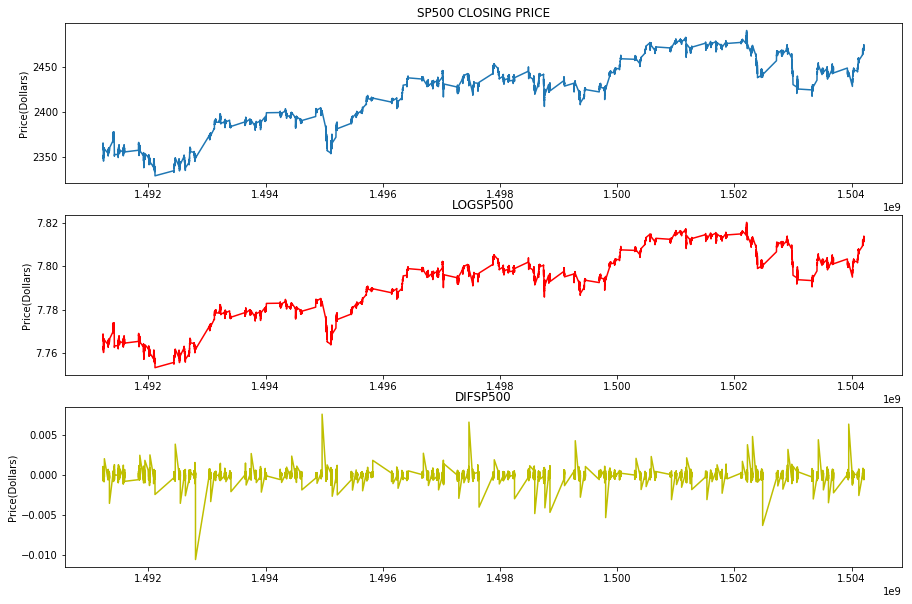

In [8]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.SP500,label='SP500 Price')
plt.title('SP500 CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logsp500,label='LOG SP500',color='r')
plt.title('LOGSP500')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogsp500,label='DIFFERENCE IN LOG SP500',color='y')
plt.title('DIFSP500')
plt.ylabel('Price(Dollars)')

Text(0,0.5,'PACF')

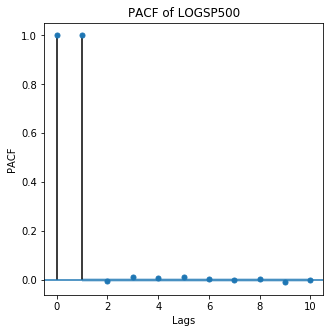

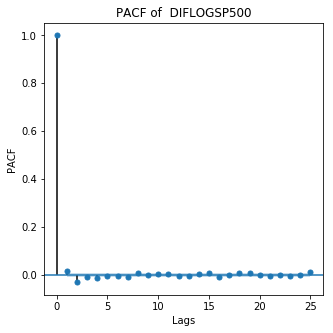

In [9]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logsp500,lags=10,ax=ax)
ax.set_title('PACF of LOGSP500')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogsp500,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOGSP500')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOGSP500))')

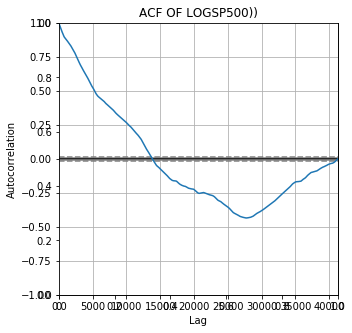

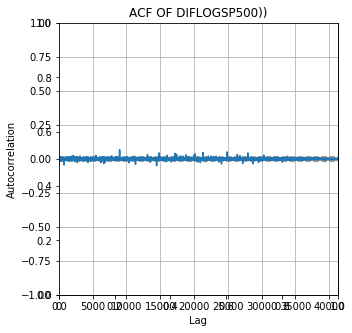

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.logsp500)
ax.set_title('ACF OF LOGSP500))')
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.diflogsp500)
ax.set_title('ACF OF DIFLOGSP500))')

In [11]:
arr=(df_new.logsp500.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))
ARIMA_mod=ARIMA(arr,(p,d,q)).fit() 


(0, 1, 0) -576197.2378325625


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 1) -576205.4988830332
(0, 1, 2) -576244.0626306938
(1, 1, 0) -576204.8971420523
(1, 1, 1) -576210.8770904872
(1, 1, 2) -576247.3238615913


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1, 0) -576243.5825036692
(2, 1, 1) -576245.5795860161


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 2) -576232.5837918808
Best model is : (1, 1, 2)


In [15]:
ARIMA_mod
ARIMA_mod.predict()
print('Length of the prediction:',len(ARIMA_mod.predict()))

Length of the prediction: 41264


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [18]:
df_new.shape

(41265, 4)

In [19]:
df_new.drop([0],axis=0,inplace=True)
df_new.head()

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,SP500,logsp500,diflogsp500
1,1491226260,2364.1001,7.768153,0.000601
2,1491226320,2362.6799,7.767552,-0.000690
3,1491226380,2364.3101,7.768242,-0.000228
4,1491226440,2364.8501,7.768470,-0.000326
5,1491226500,2365.6201,7.768795,0.000178


In [20]:
df_new['predict']=ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_new.head()

,DATE,SP500,logsp500,diflogsp500,predict
1,1491226260,2364.1001,7.768153,0.000601,0.000001
2,1491226320,2362.6799,7.767552,-0.000690,0.000004
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015
4,1491226440,2364.8501,7.768470,-0.000326,0.000030
5,1491226500,2365.6201,7.768795,0.000178,-0.000014


In [22]:
np.mean(np.square(np.array((df_new['diflogsp500']-df_new['predict']))))

5.0545663338437616e-08

In [23]:
error=(df_new['diflogsp500']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_new.head()

,DATE,SP500,logsp500,diflogsp500,predict,Error,SquareError
1,1491226260,2364.1001,7.768153,0.000601,0.000001,0.000600,3.598060e-07
2,1491226320,2362.6799,7.767552,-0.000690,0.000004,-0.000694,4.814882e-07
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015,-0.000213,4.555077e-08
4,1491226440,2364.8501,7.768470,-0.000326,0.000030,-0.000355,1.261181e-07
5,1491226500,2365.6201,7.768795,0.000178,-0.000014,0.000192,3.675106e-08


Text(0,0.5,'Date')

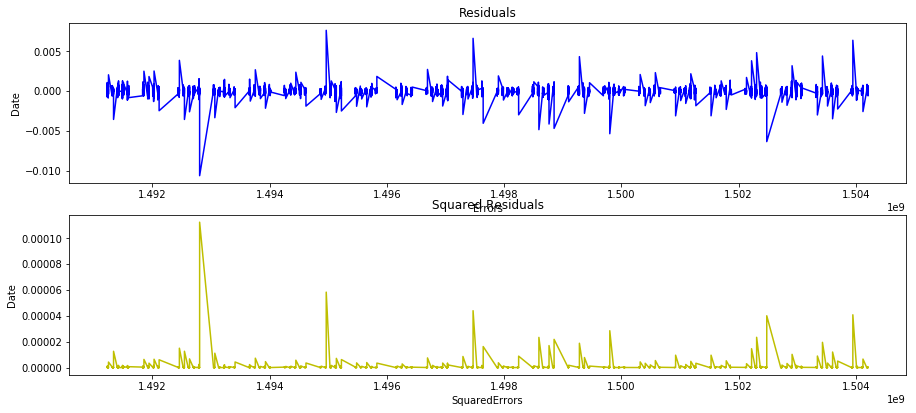

In [25]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')

AttributeError: 'DataFrame' object has no attribute 'Error'

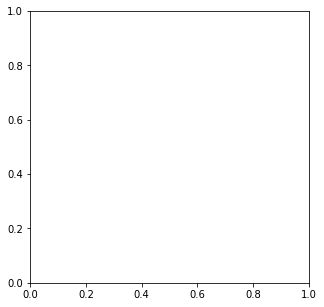

In [38]:
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')

Text(0,0.5,'PACF')

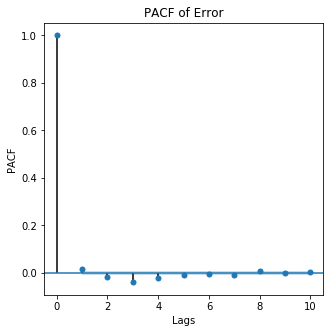

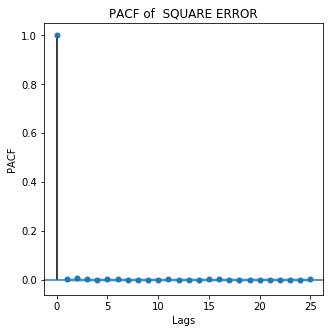

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

# NASDAQ.AAPL FORECAST

# DATA OPTIMIZATION

In [3]:
df['logaapl']=np.log(df['NASDAQ.AAPL'])
df['diflogaapl']=df['logaapl']-df['logaapl'].shift(periods=-1)
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logaapl,diflogaapl
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835


In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL  

In [6]:
df.shape

(41265, 504)

# NASDAQ AAPL DATASET

In [7]:
df_new=df[['DATE','NASDAQ.AAPL','logaapl','diflogaapl']]
df_new.head()


,DATE,NASDAQ.AAPL,logaapl,diflogaapl
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

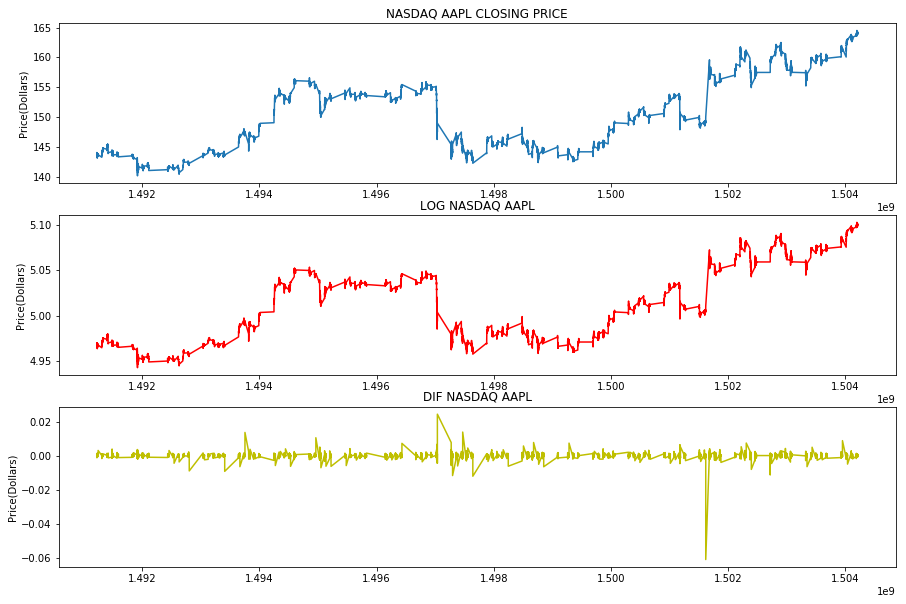

In [8]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.AAPL'],label='NASDAQ AAPL')
plt.title('NASDAQ AAPL CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logaapl,label='LOG NASDAQ AAPL',color='r')
plt.title('LOG NASDAQ AAPL')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogaapl,label='DIFFERENCE IN NASDAQ AAPL',color='y')
plt.title('DIF NASDAQ AAPL')
plt.ylabel('Price(Dollars)')



# PACF OF NASDAQ AAPL

Text(0,0.5,'PACF')

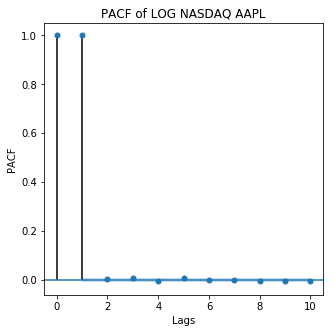

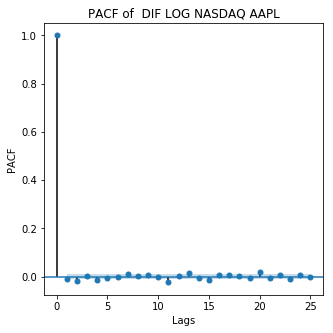

In [9]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logaapl,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ AAPL')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogaapl,lags=25,ax=ax)
ax.set_title('PACF of  DIF LOG NASDAQ AAPL')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF NASDAQ AAPL

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOG NASDAQ AAPL))')

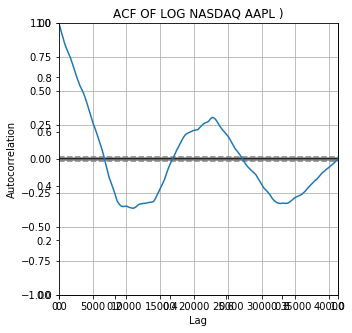

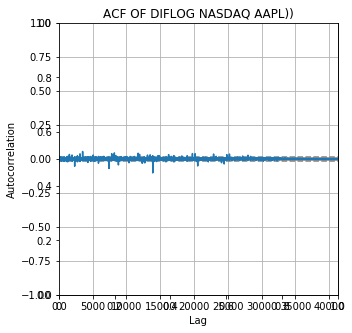

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logaapl)
ax.set_title('ACF OF LOG NASDAQ AAPL )')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogaapl)
ax.set_title('ACF OF DIFLOG NASDAQ AAPL))')


# FINDING THE BEST P,D,Q VALUES OF ARIMA MODEL

In [11]:
arr=(df_new.logaapl.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -492700.90926152444


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -492702.548904756
(0, 1, 2) -492713.6664331138
(1, 1, 0) -492702.42483537254


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -492702.9177498944
(1, 1, 2) -492714.3652025151
(2, 1, 0) -492713.40239412786
(2, 1, 1) -492713.8135622105
Best model is : (1, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [12]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [13]:
ARIMA_mod

In [14]:
ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([3.18659193e-06, 1.92993502e-06, 1.41783730e-06, ...,
       1.00565179e-05, 4.66664711e-06, 7.97919230e-06])

In [15]:
print('Length of ARIMA MODEL',len(ARIMA_mod.predict()))

Length of ARIMA MODEL 41264


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [16]:
df_new.shape

(41265, 4)

In [17]:
df_new.drop([0],axis=0,inplace=True)
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.AAPL,logaapl,diflogaapl
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835
5,1491226500,143.7800,4.968284,-0.000584


In [18]:
df_new.shape

(41264, 4)

In [19]:
df_new['predict']=ARIMA_mod.predict()
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.AAPL,logaapl,diflogaapl,predict
1,1491226260,143.7000,4.967728,0.000069,0.000003
2,1491226320,143.6901,4.967659,0.000349,0.000002
3,1491226380,143.6400,4.967310,-0.000139,0.000001
4,1491226440,143.6600,4.967449,-0.000835,0.000008
5,1491226500,143.7800,4.968284,-0.000584,0.000008


# ERROR VISUALIZATION

In [20]:
print('Mean Square Error:',np.mean(np.square(np.array((df_new['diflogaapl']-df_new['predict'])))))

Mean Square Error: 3.8208716787972746e-07


In [21]:
error=(df_new['diflogaapl']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df_new.head()

,DATE,NASDAQ.AAPL,logaapl,diflogaapl,predict,Error,SquareError
1,1491226260,143.7000,4.967728,0.000069,0.000003,0.000066,4.317713e-09
2,1491226320,143.6901,4.967659,0.000349,0.000002,0.000347,1.202688e-07
3,1491226380,143.6400,4.967310,-0.000139,0.000001,-0.000141,1.978105e-08
4,1491226440,143.6600,4.967449,-0.000835,0.000008,-0.000843,7.113123e-07
5,1491226500,143.7800,4.968284,-0.000584,0.000008,-0.000592,3.501069e-07


Text(0,0.5,'Date')

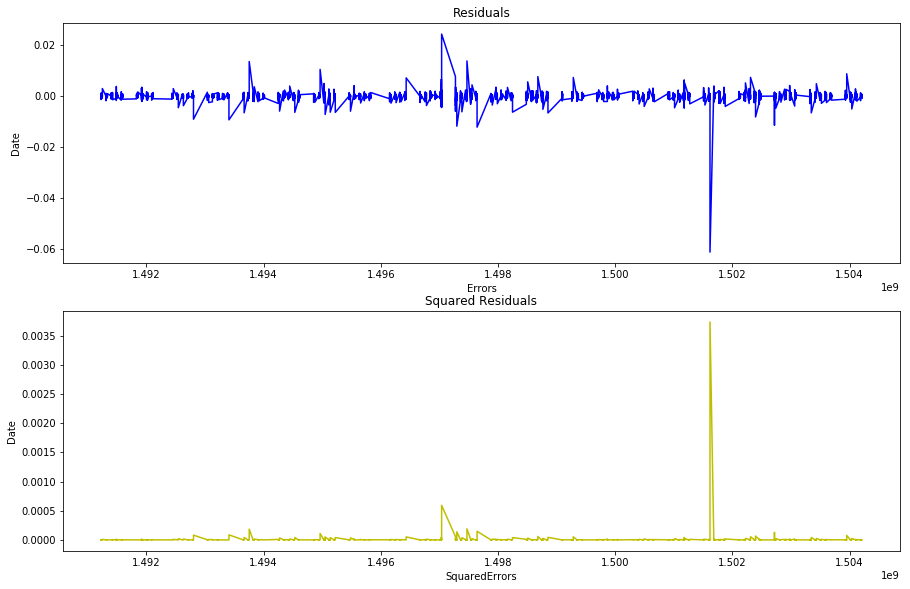

In [27]:
fig,ax=plt.subplots(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF SQUARE ERROR')

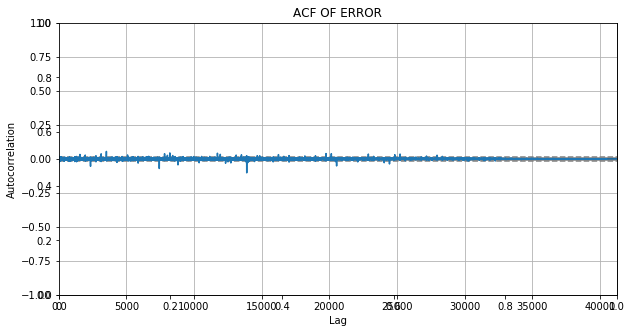

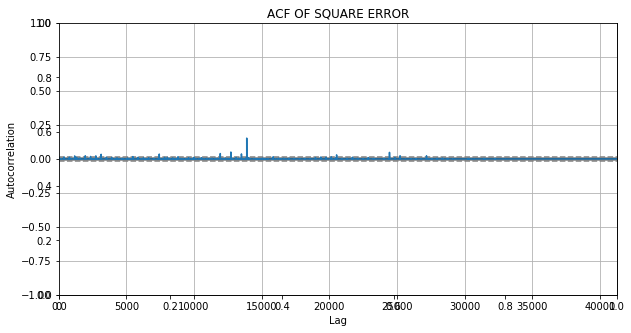

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')



Text(0,0.5,'PACF')

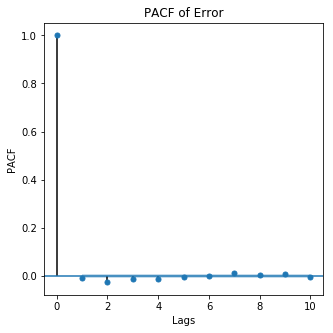

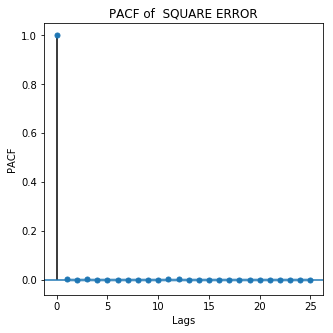

In [25]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')



# NASDAQ.ADP FORECAST

# OPTIMIZATION OF DATASET

In [29]:
df['logadp']=np.log(df['NASDAQ.ADP'])
df['diflogadp']=df['logadp']-df['logadp'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logaapl,diflogaapl,logadp,diflogadp
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196


In [30]:
df.dropna(inplace=True)

In [31]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH  

In [32]:
df.shape

(41264, 506)

# NASDAQ ADP DATASET

In [39]:
df_new=df[['DATE','NASDAQ.ADP','logadp','diflogadp']]
df_new.head()


,DATE,NASDAQ.ADP,logadp,diflogadp
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

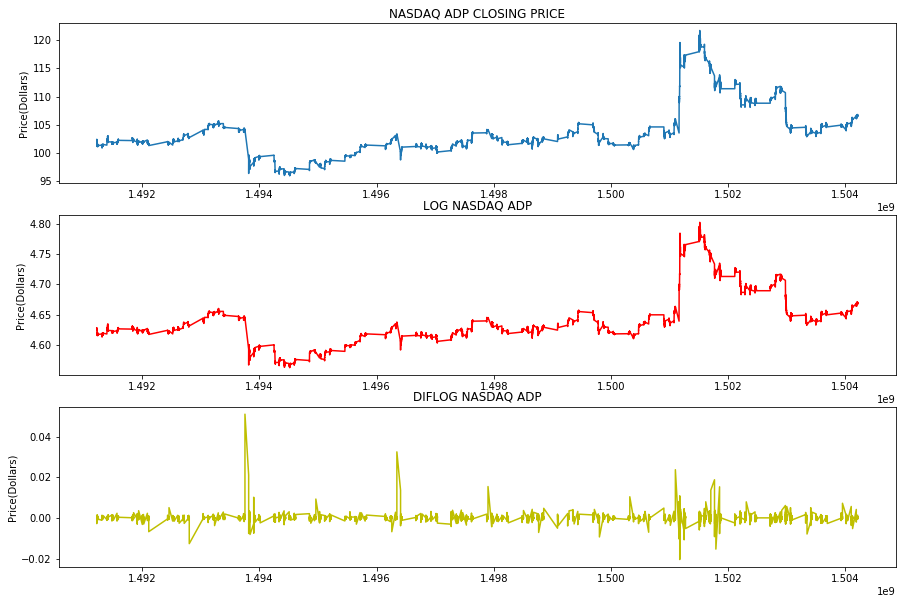

In [37]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.ADP'],label='NASDAQ ADP Price')
plt.title('NASDAQ ADP CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logadp,label='LOG NASDAQ ADP',color='r')
plt.title('LOG NASDAQ ADP')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogadp,label='DIFFERENCE IN LOG NASDAQ ADP',color='y')
plt.title('DIFLOG NASDAQ ADP')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ ADP

Text(0,0.5,'PACF')

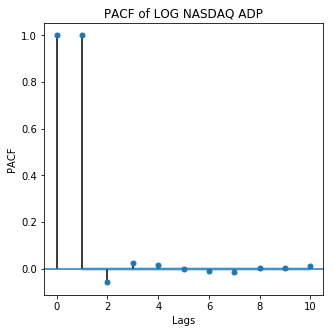

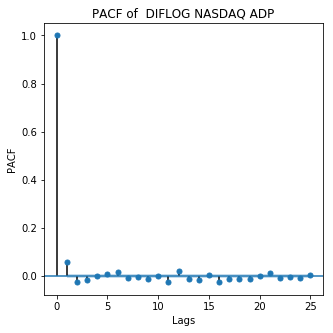

In [40]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logadp,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ ADP')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogadp,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ ADP')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ ADP

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOG NASDAQ ADP')

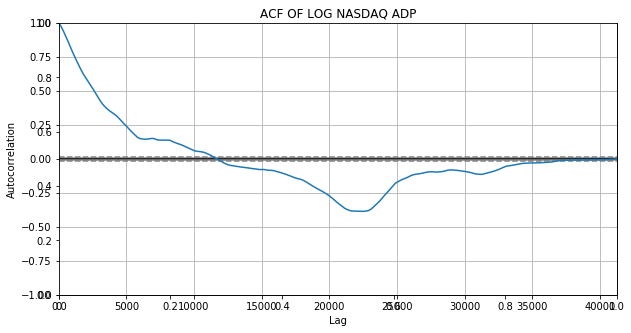

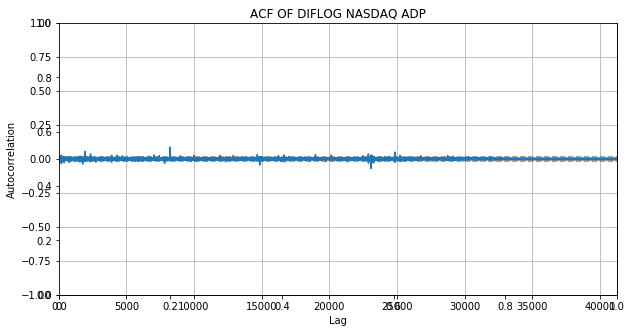

In [43]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logadp)
ax.set_title('ACF OF LOG NASDAQ ADP')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogadp)
ax.set_title('ACF OF DIFLOG NASDAQ ADP')


# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [46]:
arr=(df_new.logadp.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -482518.2036049923


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -482670.44153660245
(0, 1, 2) -482684.1448843109
(1, 1, 0) -482663.5740968307
(1, 1, 1) -482678.83031810005
(1, 1, 2) -482692.3970702181
(2, 1, 0) -482690.10050829046
(2, 1, 1) -482694.9517535401
(2, 1, 2) -482704.91881483374
Best model is : (2, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [47]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [48]:
ARIMA_mod

In [49]:
ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 9.90925944e-07, -5.17176243e-05,  6.71547142e-05, ...,
        1.02771367e-05, -4.18049334e-05,  2.67723500e-05])

In [51]:
print('Length of the model:',len(ARIMA_mod.predict()))

Length of the model: 41263


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [52]:
df_new.shape

(41264, 4)

In [54]:
df_new.drop([0],axis=0,inplace=True)
df_new.head()

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.ADP,logadp,diflogadp
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196
5,1491226500,102.0400,4.625365,-0.002838


In [55]:
df_new['predict']=ARIMA_mod.predict()
df_new.head()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.ADP,logadp,diflogadp,predict
1,1491226260,102.1400,4.626344,-0.000710,9.909259e-07
2,1491226320,102.2125,4.627054,0.000710,-5.171762e-05
3,1491226380,102.1400,4.626344,0.000784,6.715471e-05
4,1491226440,102.0600,4.625561,0.000196,-4.277089e-05
5,1491226500,102.0400,4.625365,-0.002838,-4.354404e-05


# ERRORS

In [57]:
print('Mean Square Error:',np.mean(np.square(np.array((df_new['diflogadp']-df_new['predict'])))))

Mean Square Error: 4.901645391170019e-07


In [58]:
error=(df_new['diflogadp']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
df_new.head()

,DATE,NASDAQ.ADP,logadp,diflogadp,predict,Error,SquareError
1,1491226260,102.1400,4.626344,-0.000710,9.909259e-07,-0.000711,5.048802e-07
2,1491226320,102.2125,4.627054,0.000710,-5.171762e-05,0.000761,5.795410e-07
3,1491226380,102.1400,4.626344,0.000784,6.715471e-05,0.000716,5.132159e-07
4,1491226440,102.0600,4.625561,0.000196,-4.277089e-05,0.000239,5.700311e-08
5,1491226500,102.0400,4.625365,-0.002838,-4.354404e-05,-0.002794,7.808938e-06


Text(0,0.5,'Date')

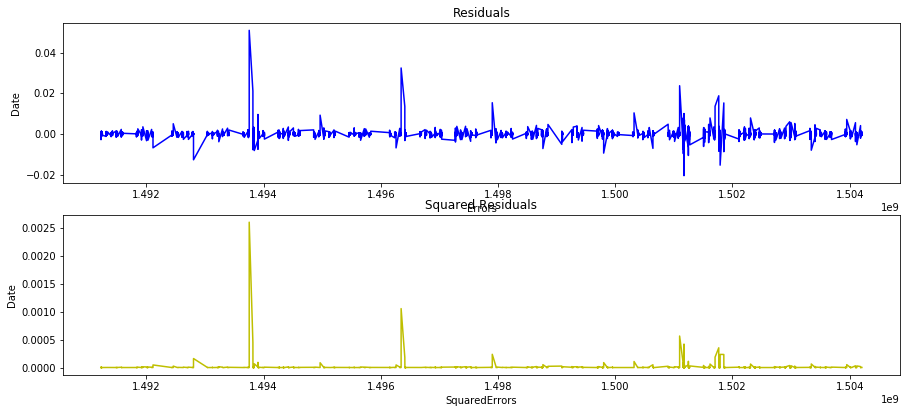

In [60]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF SQUARE ERROR')

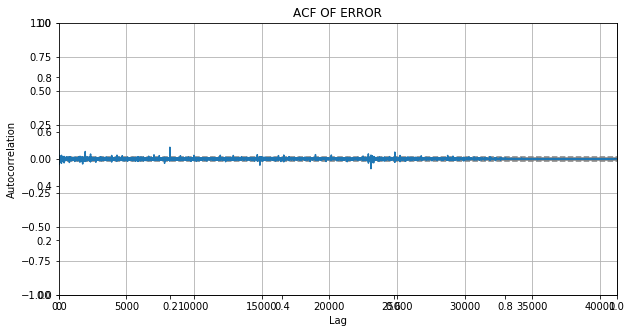

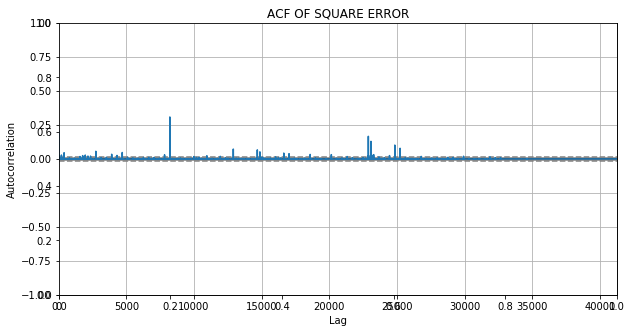

In [62]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

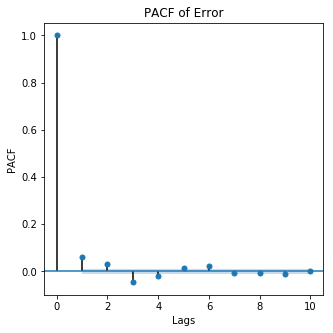

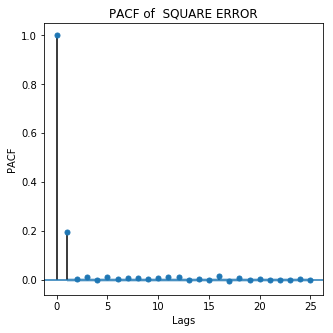

In [63]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ CBOE FORECAST

# DATASET OPTIMIZATION

In [64]:
df['logcboe']=np.log(df['NASDAQ.CBOE'])
df['diflogcboe']=df['logcboe']-df['logcboe'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232


In [65]:
df.dropna(inplace=True)

In [66]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logaapl   

In [67]:
df.shape

(41263, 508)

# NASDAQ CBOE DATASET

In [68]:
df_new=df[['DATE','NASDAQ.CBOE','logcboe','diflogcboe']]
df_new.head()


,DATE,NASDAQ.CBOE,logcboe,diflogcboe
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

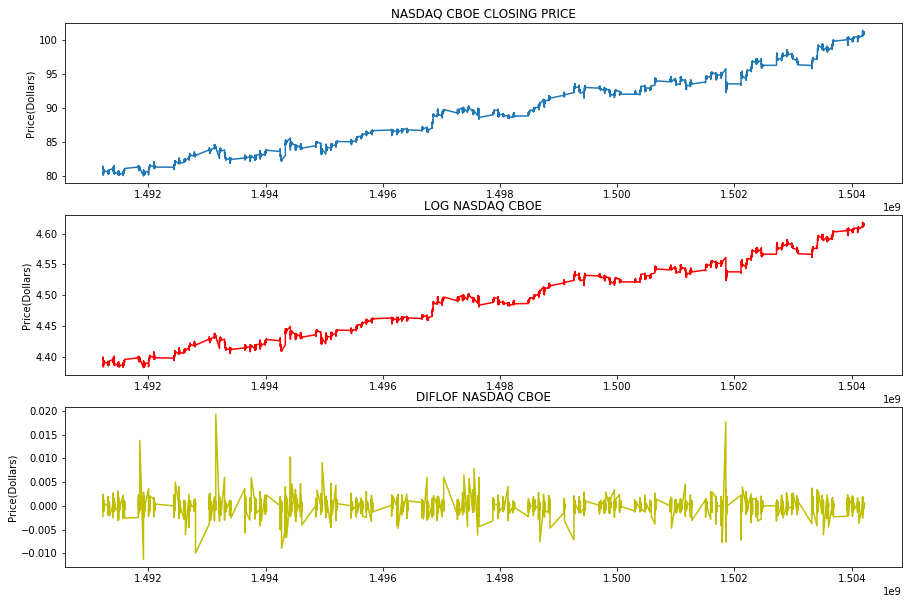

In [69]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.CBOE'],label='NASDAQ CBOE Price')
plt.title('NASDAQ CBOE CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logcboe,label='LOG SP500',color='r')
plt.title('LOG NASDAQ CBOE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogcboe,label='DIFFERENCE IN LOG NASDAQ CBOE',color='y')
plt.title('DIFLOF NASDAQ CBOE')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ CBOE

Text(0,0.5,'PACF')

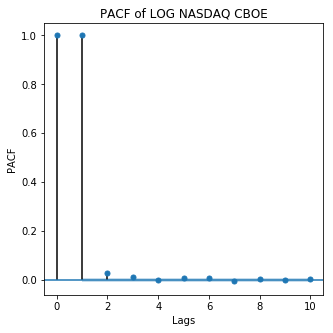

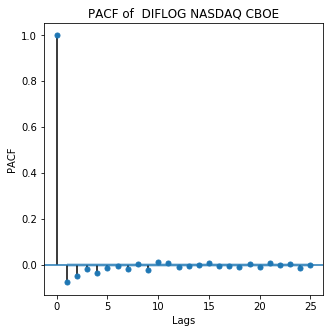

In [70]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logcboe,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ CBOE')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogcboe,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ CBOE')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ CBOE

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOG NASDAQ CBOE')

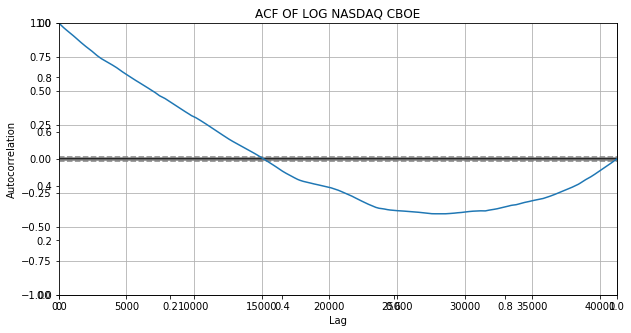

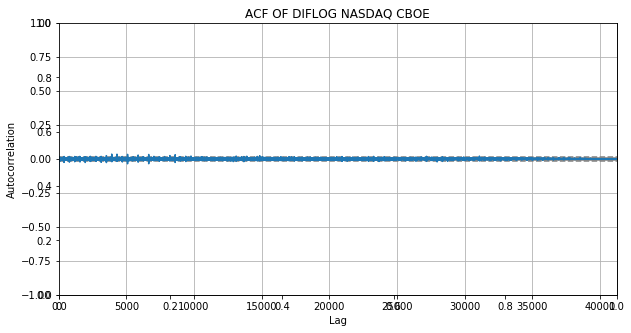

In [89]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logcboe)
ax.set_title('ACF OF LOG NASDAQ CBOE')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogcboe)
ax.set_title('ACF OF DIFLOG NASDAQ CBOE')



# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [72]:
arr=(df_new.logcboe.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -506044.74882162106


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -506310.50459741324
(0, 1, 2) -506401.4393758826
(1, 1, 0) -506287.58634646016
(1, 1, 1) -506444.8500859948
(1, 1, 2) -506436.7379473959
(2, 1, 0) -506382.9519642622
(2, 1, 1) -506437.928261366
(2, 1, 2) -506444.17704118113
Best model is : (1, 1, 1)


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# IMPLEMENTATION OF ARIMA MODEL

In [73]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [74]:
ARIMA_mod
ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 5.29853621e-06, -1.65742946e-04, -9.58047645e-05, ...,
        1.68490991e-05,  4.49556816e-06,  5.17676230e-06])

In [76]:
print('Length of the arima model',len(ARIMA_mod.predict()))

Length of the arima model 41262


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [77]:
df_new.shape

(41263, 4)

In [78]:
df_new.head()

,DATE,NASDAQ.CBOE,logcboe,diflogcboe
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


In [79]:
df_new.drop([0],axis=0,inplace=True)
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.CBOE,logcboe,diflogcboe
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232
5,1491226500,81.22,4.397162,0.000739


In [80]:
df_new['predict']=ARIMA_mod.predict()
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.CBOE,logcboe,diflogcboe,predict
1,1491226260,81.21,4.397038,0.000000,0.000005
2,1491226320,81.21,4.397038,0.000986,-0.000166
3,1491226380,81.13,4.396053,0.000123,-0.000096
4,1491226440,81.12,4.395930,-0.001232,0.000026
5,1491226500,81.22,4.397162,0.000739,0.000029


# ERROR

In [82]:
print('Mean Squared Error:',np.mean(np.square(np.array((df_new['diflogcboe']-df_new['predict'])))))



Mean Squared Error: 2.8158716545755275e-07


In [83]:
error=(df_new['diflogcboe']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
df_new.head()

,DATE,NASDAQ.CBOE,logcboe,diflogcboe,predict,Error,SquareError
1,1491226260,81.21,4.397038,0.000000,0.000005,-0.000005,2.807449e-11
2,1491226320,81.21,4.397038,0.000986,-0.000166,0.001151,1.325558e-06
3,1491226380,81.13,4.396053,0.000123,-0.000096,0.000219,4.799225e-08
4,1491226440,81.12,4.395930,-0.001232,0.000026,-0.001258,1.583705e-06
5,1491226500,81.22,4.397162,0.000739,0.000029,0.000710,5.048067e-07


Text(0,0.5,'Date')

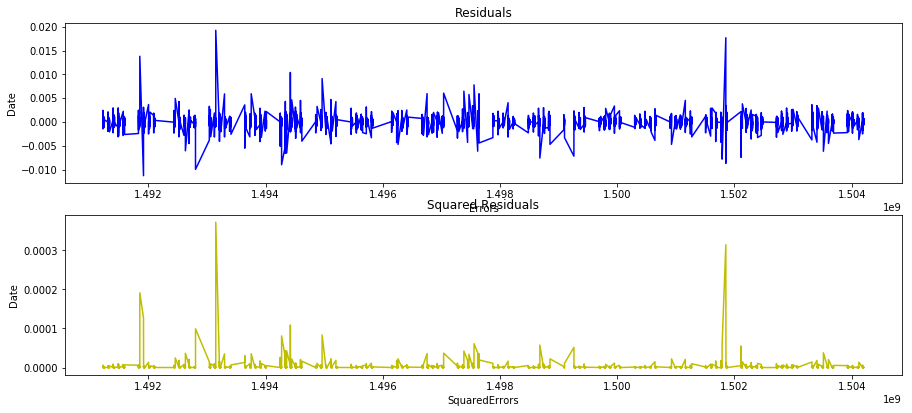

In [85]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF SQUARE ERROR')

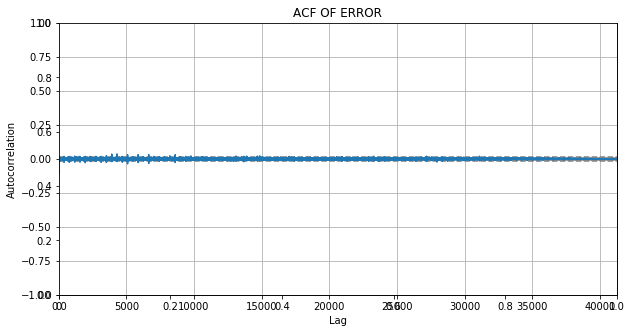

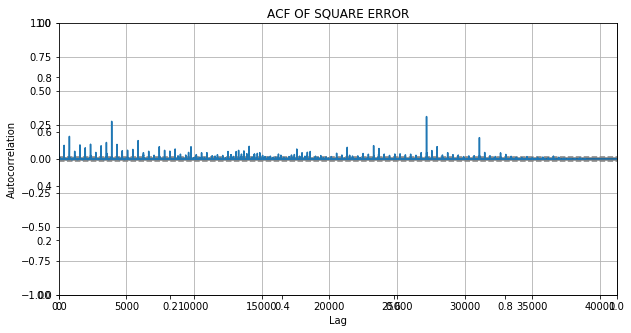

In [88]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

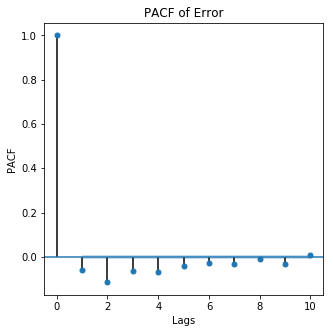

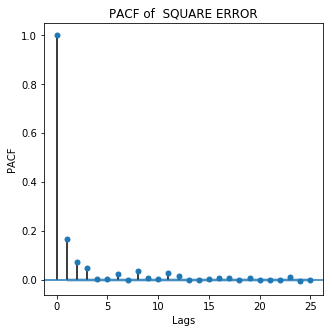

In [90]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ CSCO FORECAST

# DATASET OPTIMIZATION

In [91]:
df['logcsco']=np.log(df['NASDAQ.CSCO'])
df['diflogcsco']=df['logcsco']-df['logcsco'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.ZBH,NYSE.ZTS,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe,logcsco,diflogcsco
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,121.700,53.365,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181


In [92]:
df.dropna(inplace=True)

In [93]:
df.isna().sum()


DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logaapl         0
diflogaapl      0
logadp    

In [94]:
df.shape

(41262, 510)

# NASDAQ CSCO DATASET

In [96]:
df_new=df[['DATE','NASDAQ.CSCO','logcsco','diflogcsco']]
df_new.head()


,DATE,NASDAQ.CSCO,logcsco,diflogcsco
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

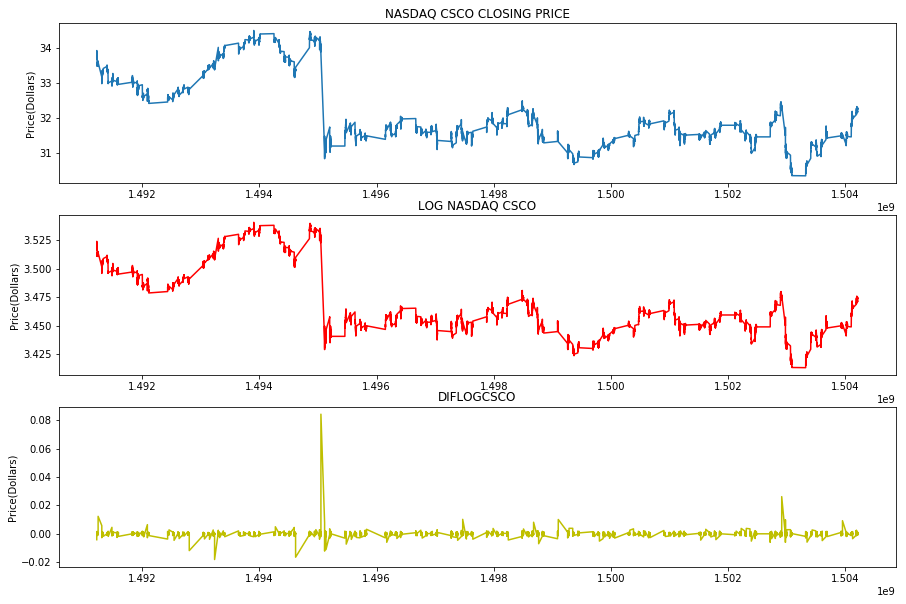

In [97]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.CSCO'],label='NASDAQ CSCO Price')
plt.title('NASDAQ CSCO CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logcsco,label='LOG CSCO Price',color='r')
plt.title('LOG NASDAQ CSCO')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogcsco,label='DIFFERENCE IN LOG SP500',color='y')
plt.title('DIFLOGCSCO')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ CSCO

Text(0,0.5,'PACF')

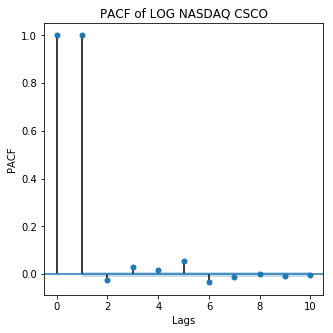

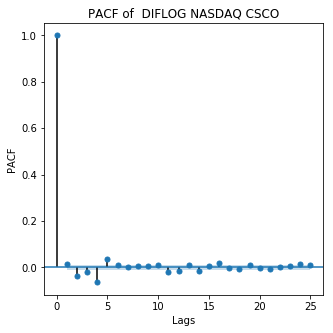

In [99]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logcsco,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ CSCO')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogcsco,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ CSCO')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ CSCO

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOG NASDAQ CSCO')

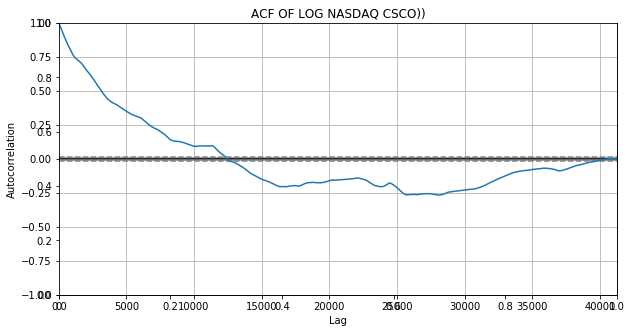

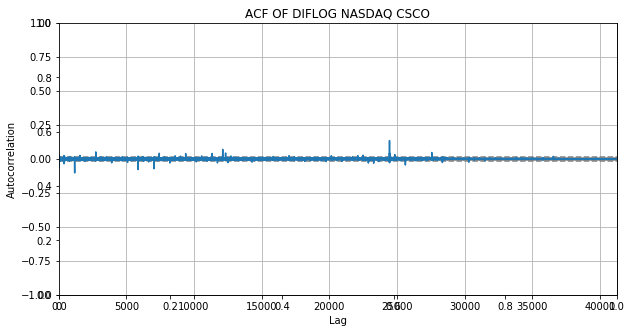

In [100]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logcsco)
ax.set_title('ACF OF LOG NASDAQ CSCO))')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogcsco)
ax.set_title('ACF OF DIFLOG NASDAQ CSCO')


# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [101]:
arr=(df_new.logcsco.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -486815.8987440844


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -486825.4136381613
(0, 1, 2) -486886.4972686092
(1, 1, 0) -486824.61969271424


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -486826.1810981654
(1, 1, 2) -486886.09212566057
(2, 1, 0) -486880.6921033033
(2, 1, 1) -486879.11818655854
(2, 1, 2) -486896.04008793907
Best model is : (2, 1, 2)


# IMPLEMENTATION OF ARIMA MODEL

In [102]:
ARIMA_mod=ARIMA(arr,(p,d,q)).fit()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [103]:
ARIMA_mod

In [104]:
ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-1.14881974e-06,  6.45701660e-05, -1.47483108e-04, ...,
        4.16463134e-05, -3.96218750e-05,  4.24229574e-06])

In [105]:
print('Length of the model:',len(ARIMA_mod.predict()))

Length of the model: 41261


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [106]:
df_new.shape

(41262, 4)

In [107]:
df_new.head()

,DATE,NASDAQ.CSCO,logcsco,diflogcsco
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


In [108]:
df_new.drop([0],axis=0,inplace=True)
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.CSCO,logcsco,diflogcsco
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181
5,1491226500,33.8800,3.522825,-0.000590


In [109]:
df_new['predict']=ARIMA_mod.predict()
df_new.head()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.CSCO,logcsco,diflogcsco,predict
1,1491226260,33.8800,3.522825,-0.000590,-0.000001
2,1491226320,33.9000,3.523415,0.001479,0.000065
3,1491226380,33.8499,3.521936,0.000293,-0.000147
4,1491226440,33.8400,3.521644,-0.001181,-0.000044
5,1491226500,33.8800,3.522825,-0.000590,0.000034


# ERROR

In [112]:
print('Mean squared error:',np.mean(np.square(np.array((df_new['diflogcsco']-df_new['predict'])))))

Mean squared error: 4.403050845380955e-07


In [113]:
error=(df_new['diflogcsco']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
df_new.head()

,DATE,NASDAQ.CSCO,logcsco,diflogcsco,predict,Error,SquareError
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,-0.000589,3.469160e-07
2,1491226320,33.9000,3.523415,0.001479,0.000065,0.001414,2.000525e-06
3,1491226380,33.8499,3.521936,0.000293,-0.000147,0.000440,1.935943e-07
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,-0.001137,1.293164e-06
5,1491226500,33.8800,3.522825,-0.000590,0.000034,-0.000624,3.890871e-07


Text(0,0.5,'Date')

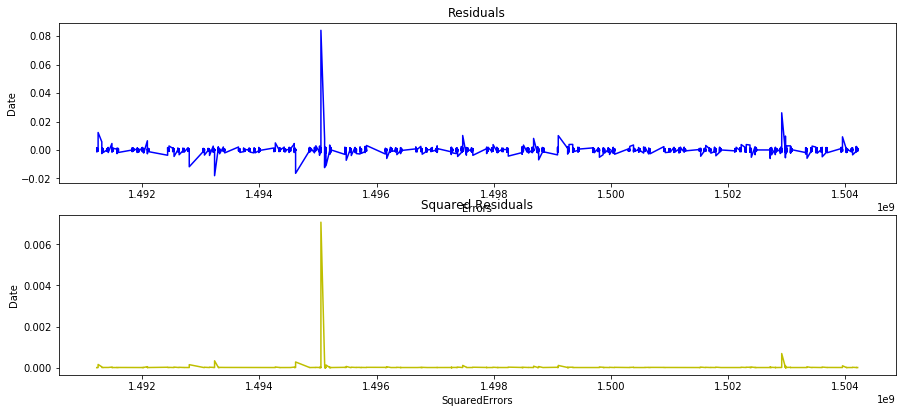

In [115]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('SquaredErrors')
plt.ylabel('Date')


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF SQUARE ERROR')

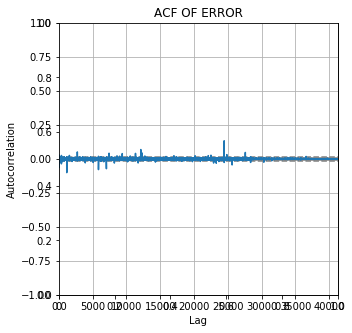

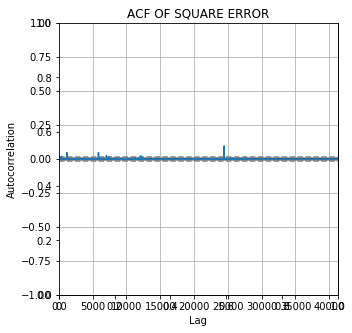

In [117]:
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR')
fig,ax=plt.subplots(figsize=(5,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

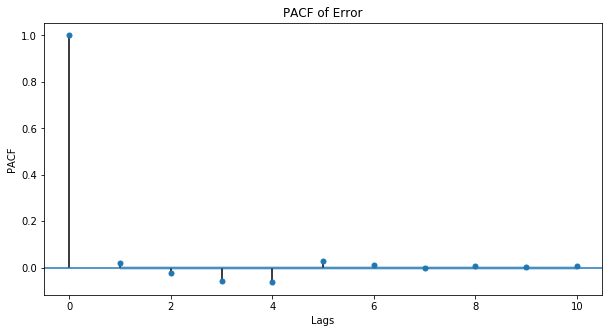

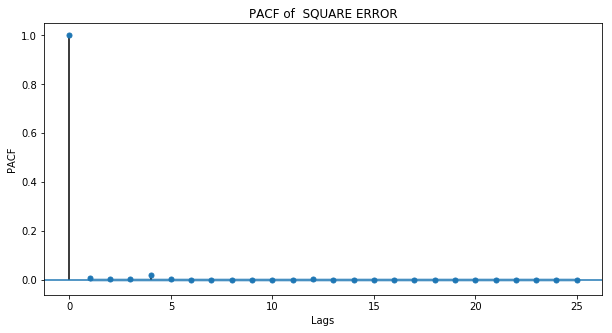

In [119]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# NASDAQ EBAY DATASET

In [120]:
df['logebay']=np.log(df['NASDAQ.EBAY'])
df['diflogebay']=df['logebay']-df['logebay'].shift(periods=-1)
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,logaapl,diflogaapl,logadp,diflogadp,logcboe,diflogcboe,logcsco,diflogcsco,logebay,diflogebay
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,4.967589,-0.000139,4.627225,0.000881,4.394819,-0.002219,3.518684,-0.004141,3.508481,0.000075
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,4.967728,0.000069,4.626344,-0.000710,4.397038,0.000000,3.522825,-0.000590,3.508406,-0.000449
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,4.967659,0.000349,4.627054,0.000710,4.397038,0.000986,3.523415,0.001479,3.508855,0.002247
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,4.967310,-0.000139,4.626344,0.000784,4.396053,0.000123,3.521936,0.000293,3.506608,-0.001948
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,4.967449,-0.000835,4.625561,0.000196,4.395930,-0.001232,3.521644,-0.001181,3.508556,-0.000898


In [121]:
df.dropna(inplace=True)

In [122]:
df.isna().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX        0
NYSE.XYL        0
NYSE.YUM        0
NYSE.ZBH        0
NYSE.ZTS        0
logaapl         0
diflogaapl      0
logadp          0
diflogadp       0
logcboe   

In [123]:
df.shape

(41261, 512)

# NASDAQ EBAY DATASET

In [124]:
df_new=df[['DATE','NASDAQ.EBAY','logebay','diflogebay']]
df_new.head()


,DATE,NASDAQ.EBAY,logebay,diflogebay
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


# DATA VISUALIZATION

Text(0,0.5,'Price(Dollars)')

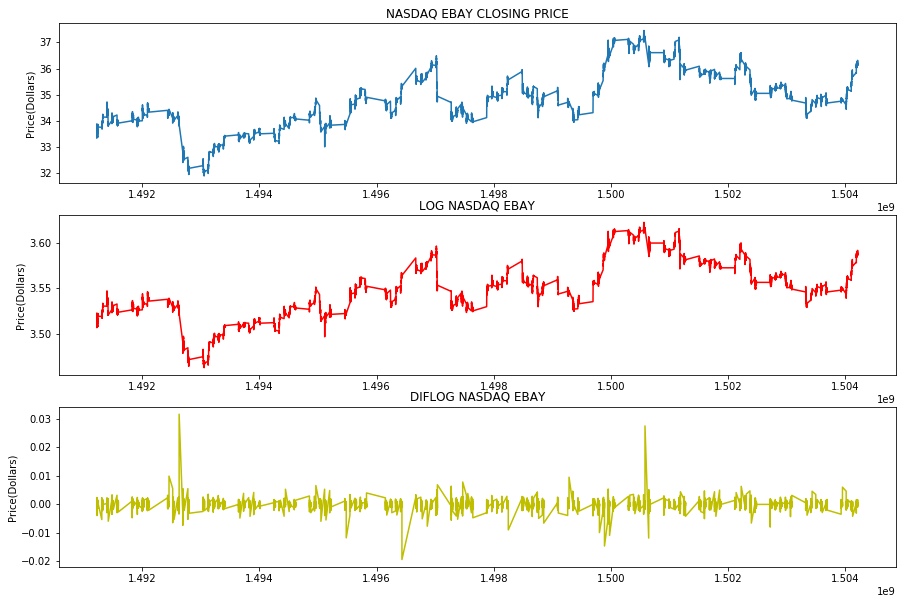

In [125]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new['NASDAQ.EBAY'],label='NASDAQ EBAY Price')
plt.title('NASDAQ EBAY CLOSING PRICE')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.logebay,label='LOG SP500',color='r')
plt.title('LOG NASDAQ EBAY')
plt.ylabel('Price(Dollars)')
plt.subplot(3,1,3)
plt.plot(df_new.DATE,df_new.diflogebay,label='DIFFERENCE IN LOG SP500',color='y')
plt.title('DIFLOG NASDAQ EBAY')
plt.ylabel('Price(Dollars)')


# PACF OF NASDAQ EBAY

Text(0,0.5,'PACF')

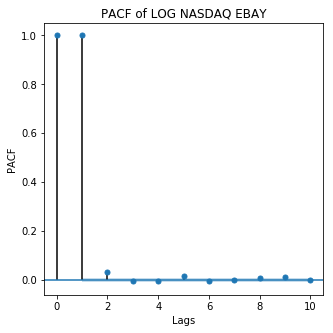

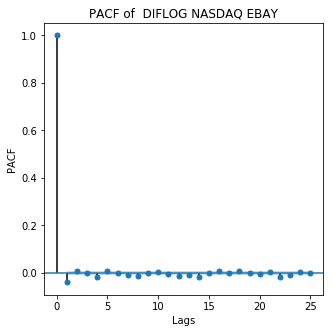

In [126]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.logebay,lags=10,ax=ax)
ax.set_title('PACF of LOG NASDAQ EBAY')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.diflogebay,lags=25,ax=ax)
ax.set_title('PACF of  DIFLOG NASDAQ EBAY')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')


# ACF OF NASDAQ EBAY

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF DIFLOG NASDAQ EBAY')

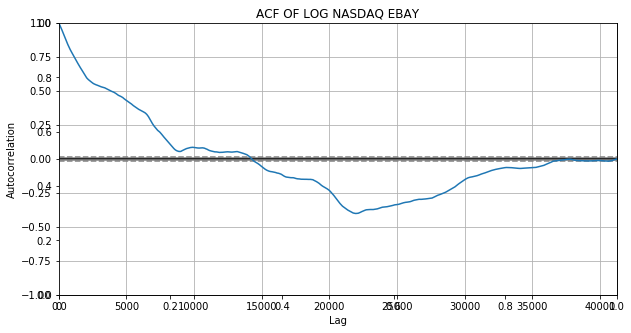

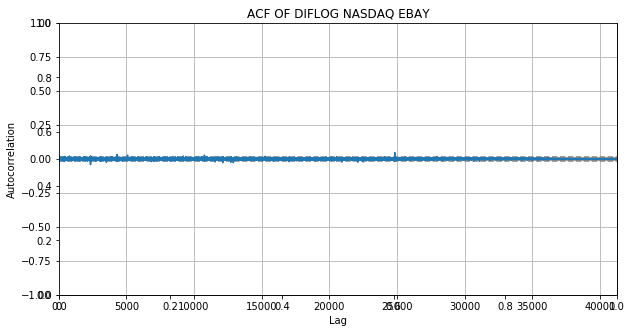

In [127]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.logebay)
ax.set_title('ACF OF LOG NASDAQ EBAY')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.diflogebay)
ax.set_title('ACF OF DIFLOG NASDAQ EBAY')



# FINDING THE BEST P D Q VALUES FOR ARIMA MODEL

In [128]:
arr=(df_new.logebay.dropna().as_matrix())
p=0
q=0
d=1
pdq=[]
aic=[]
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(arr,(p,d,q)).fit()
            x=model.aic
            x1=(p,d,q)
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass

keys=pdq
values=aic
d=dict(zip(keys,values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print('Best model is :',(p,d,q))


(0, 1, 0) -486475.2321536507


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -486538.6211403725
(0, 1, 2) -486539.0782565923
(1, 1, 0) -486539.55351047614


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) -486538.88014058035
(1, 1, 2) -486537.1978845234
(2, 1, 0) -486539.1672676079
Best model is : (1, 1, 0)


# IMPLEMENTATION OF ARIMA MODEL

In [130]:
ARIMA_mod

In [131]:
ARIMA_mod.predict()

C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-1.14881974e-06,  6.45701660e-05, -1.47483108e-04, ...,
        4.16463134e-05, -3.96218750e-05,  4.24229574e-06])

In [132]:
print('Length of the ARIMA Model:',len(ARIMA_mod.predict()))

Length of the ARIMA Model: 41261


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [133]:
df_new.shape

(41261, 4)

In [134]:
df_new.head()

,DATE,NASDAQ.EBAY,logebay,diflogebay
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


In [135]:
df_new['predict']=ARIMA_mod.predict()
df_new.head()


C:\Users\sachin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.EBAY,logebay,diflogebay,predict
0,1491226200,33.3975,3.508481,0.000075,-0.000001
1,1491226260,33.3950,3.508406,-0.000449,0.000065
2,1491226320,33.4100,3.508855,0.002247,-0.000147
3,1491226380,33.3350,3.506608,-0.001948,-0.000044
4,1491226440,33.4000,3.508556,-0.000898,0.000034


# ERRORS

In [138]:
print('Length of the ARIMA model:',np.mean(np.square(np.array((df_new['diflogebay']-df_new['predict'])))))

Length of the ARIMA model: 4.445203816311058e-07


In [139]:
error=(df_new['diflogebay']-df_new['predict'])
df_new['Error']=error
df_new['SquareError']=np.square(error)


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
df_new.head()

,DATE,NASDAQ.EBAY,logebay,diflogebay,predict,Error,SquareError
0,1491226200,33.3975,3.508481,0.000075,-0.000001,0.000076,5.777144e-09
1,1491226260,33.3950,3.508406,-0.000449,0.000065,-0.000514,2.638244e-07
2,1491226320,33.4100,3.508855,0.002247,-0.000147,0.002395,5.735275e-06
3,1491226380,33.3350,3.506608,-0.001948,-0.000044,-0.001904,3.624616e-06
4,1491226440,33.4000,3.508556,-0.000898,0.000034,-0.000931,8.675513e-07


Text(0,0.5,'Date')

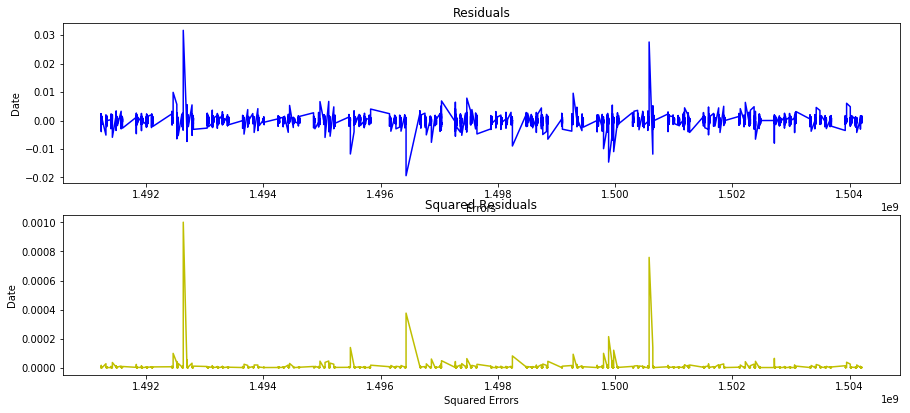

In [142]:
fig,ax=plt.subplots(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df_new.DATE,df_new.Error,label='Errors',color='b')
plt.title('Residuals')
plt.xlabel('Errors')
plt.ylabel('Date')
plt.subplot(3,1,2)
plt.plot(df_new.DATE,df_new.SquareError,label='Squared Errors',color='y')
plt.title('Squared Residuals')
plt.xlabel('Squared Errors')
plt.ylabel('Date')


C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\sachin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


Text(0.5,1,'ACF OF SQUARE ERROR')

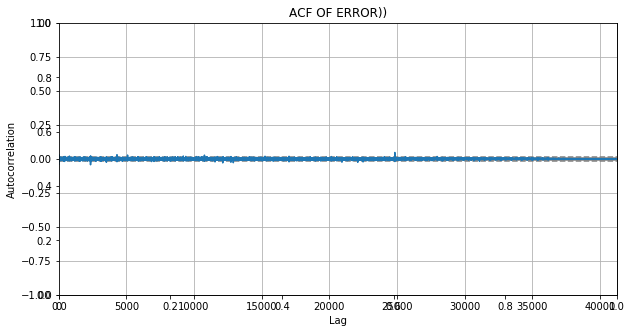

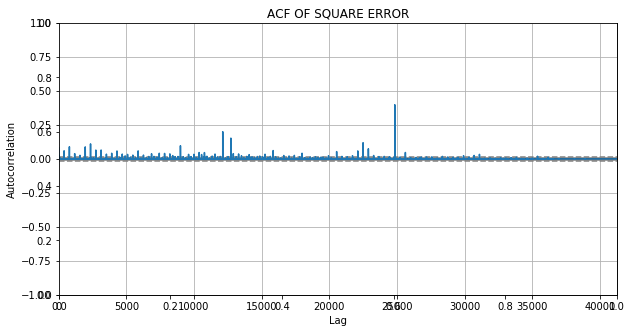

In [144]:
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.Error)
ax.set_title('ACF OF ERROR))')
fig,ax=plt.subplots(figsize=(10,5))
ax=autocorrelation_plot(df_new.SquareError)
ax.set_title('ACF OF SQUARE ERROR')


Text(0,0.5,'PACF')

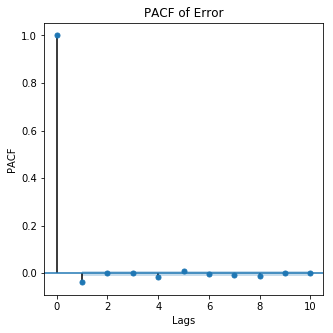

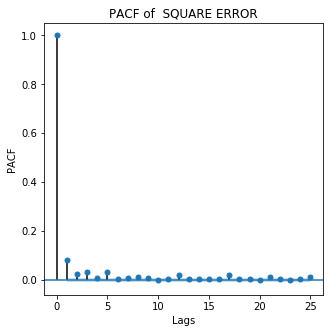

In [145]:
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.Error,lags=10,ax=ax)
ax.set_title('PACF of Error')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
fig,ax=plt.subplots(figsize=(5,5))
plot_pacf(df_new.SquareError,lags=25,ax=ax)
ax.set_title('PACF of  SQUARE ERROR')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

